In [6]:
from models import fc
from datasets import mnist
from logger import Logger
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable, grad

In [8]:
import numpy as np
import pickle
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [9]:
batch_size = 256
input_dim = 784
classes = 10
learning_rate = 0.001
reg = 0.01

epochs = 5

In [10]:
def compute_accuracy(model, dataloader):
    
    correct, total = 0.0, 0.0
    
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, pred = torch.max(outputs.data, 1)
        
        correct += torch.eq(pred, labels).sum()
        total += labels.size(0)
    
    return correct/float(total)

In [11]:
train_data, valid_data, test_data = mnist.MNIST.load_data(batch_size)
model = fc.FullyConnected(input_dim, classes)

loss_criteria = nn.CrossEntropyLoss()

In [19]:
inputs, labels = iter(train_data).next()
inputs = Variable(inputs)

In [68]:
outputs = model(inputs)
loss = loss_criteria(outputs, Variable(labels))
print loss

Variable containing:
 2.3272
[torch.FloatTensor of size 1]



In [69]:
model.zero_grad()
loss.backward(create_graph=True)
name, param = list(model.named_parameters())[0]
print name, param.grad
t = grad([loss], [inputs])
print t

fc1.weight Variable containing:
1.00000e-02 *
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatTensor of size 256x784]



RuntimeError: One of the differentiated Variables appears to not have been used in the graph

In [11]:
losses = []
valid_accs = []
train_accs = []

for epoch in xrange(epochs):
    
    for i, data in enumerate(train_data):
        inputs, labels = data
        inputs = Variable(inputs)
        labels_var = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = loss_criteria(outputs, labels_var)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0])
        print "\t Iteration %d : Loss: %f" % (i, loss.data[0])
    
    train_acc = compute_accuracy(model, train_data)
    valid_acc = compute_accuracy(model, valid_data)
    
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
    print "Epoch %d complete. Training acc: %f. Validation accuracy: %f" % (epoch, train_acc, valid_acc)

	 Iteration 0 : Loss: 2.328660
	 Iteration 1 : Loss: 2.148352
	 Iteration 2 : Loss: 2.039856
	 Iteration 3 : Loss: 1.943879
	 Iteration 4 : Loss: 1.916086
	 Iteration 5 : Loss: 1.863957
	 Iteration 6 : Loss: 1.847773
	 Iteration 7 : Loss: 1.785623
	 Iteration 8 : Loss: 1.782840
	 Iteration 9 : Loss: 1.730205
	 Iteration 10 : Loss: 1.691774
	 Iteration 11 : Loss: 1.651531
	 Iteration 12 : Loss: 1.633862
	 Iteration 13 : Loss: 1.626720
	 Iteration 14 : Loss: 1.568244
	 Iteration 15 : Loss: 1.573583
	 Iteration 16 : Loss: 1.518515
	 Iteration 17 : Loss: 1.516830
	 Iteration 18 : Loss: 1.495684
	 Iteration 19 : Loss: 1.415772
	 Iteration 20 : Loss: 1.400185
	 Iteration 21 : Loss: 1.429089
	 Iteration 22 : Loss: 1.364348
	 Iteration 23 : Loss: 1.336169
	 Iteration 24 : Loss: 1.332307
	 Iteration 25 : Loss: 1.246692
	 Iteration 26 : Loss: 1.357931
	 Iteration 27 : Loss: 1.258349
	 Iteration 28 : Loss: 1.272268
	 Iteration 29 : Loss: 1.221731
	 Iteration 30 : Loss: 1.240485
	 Iteration 31 : L

	 Iteration 64 : Loss: 0.193706
	 Iteration 65 : Loss: 0.147174
	 Iteration 66 : Loss: 0.162582
	 Iteration 67 : Loss: 0.214119
	 Iteration 68 : Loss: 0.137874
	 Iteration 69 : Loss: 0.187686
	 Iteration 70 : Loss: 0.143604
	 Iteration 71 : Loss: 0.150531
	 Iteration 72 : Loss: 0.138030
	 Iteration 73 : Loss: 0.147749
	 Iteration 74 : Loss: 0.200201
	 Iteration 75 : Loss: 0.202630
	 Iteration 76 : Loss: 0.152823
	 Iteration 77 : Loss: 0.128236
	 Iteration 78 : Loss: 0.174691
	 Iteration 79 : Loss: 0.256350
	 Iteration 80 : Loss: 0.186052
	 Iteration 81 : Loss: 0.140601
	 Iteration 82 : Loss: 0.184609
	 Iteration 83 : Loss: 0.167085
	 Iteration 84 : Loss: 0.145717
	 Iteration 85 : Loss: 0.148427
	 Iteration 86 : Loss: 0.176506
	 Iteration 87 : Loss: 0.138872
	 Iteration 88 : Loss: 0.161715
	 Iteration 89 : Loss: 0.178912
	 Iteration 90 : Loss: 0.186607
	 Iteration 91 : Loss: 0.146892
	 Iteration 92 : Loss: 0.148711
	 Iteration 93 : Loss: 0.159310
	 Iteration 94 : Loss: 0.114785
	 Iterat

	 Iteration 131 : Loss: 0.132582
	 Iteration 132 : Loss: 0.109641
	 Iteration 133 : Loss: 0.158578
	 Iteration 134 : Loss: 0.184583
	 Iteration 135 : Loss: 0.165881
	 Iteration 136 : Loss: 0.123102
	 Iteration 137 : Loss: 0.124192
	 Iteration 138 : Loss: 0.199154
	 Iteration 139 : Loss: 0.127533
	 Iteration 140 : Loss: 0.145574
	 Iteration 141 : Loss: 0.181460
	 Iteration 142 : Loss: 0.096399
	 Iteration 143 : Loss: 0.169631
	 Iteration 144 : Loss: 0.152899
	 Iteration 145 : Loss: 0.145689
	 Iteration 146 : Loss: 0.135774
	 Iteration 147 : Loss: 0.123821
	 Iteration 148 : Loss: 0.157932
	 Iteration 149 : Loss: 0.119865
	 Iteration 150 : Loss: 0.093673
	 Iteration 151 : Loss: 0.164069
	 Iteration 152 : Loss: 0.101727
	 Iteration 153 : Loss: 0.142240
	 Iteration 154 : Loss: 0.154691
	 Iteration 155 : Loss: 0.123169
	 Iteration 156 : Loss: 0.082893
	 Iteration 157 : Loss: 0.132472
	 Iteration 158 : Loss: 0.115033
	 Iteration 159 : Loss: 0.130260
	 Iteration 160 : Loss: 0.161487
	 Iteratio

	 Iteration 6 : Loss: 0.136167
	 Iteration 7 : Loss: 0.128923
	 Iteration 8 : Loss: 0.119995
	 Iteration 9 : Loss: 0.155635
	 Iteration 10 : Loss: 0.107778
	 Iteration 11 : Loss: 0.124270
	 Iteration 12 : Loss: 0.115857
	 Iteration 13 : Loss: 0.097655
	 Iteration 14 : Loss: 0.097619
	 Iteration 15 : Loss: 0.110255
	 Iteration 16 : Loss: 0.107299
	 Iteration 17 : Loss: 0.089622
	 Iteration 18 : Loss: 0.121933
	 Iteration 19 : Loss: 0.107641
	 Iteration 20 : Loss: 0.096849
	 Iteration 21 : Loss: 0.122687
	 Iteration 22 : Loss: 0.115647
	 Iteration 23 : Loss: 0.085285
	 Iteration 24 : Loss: 0.114291
	 Iteration 25 : Loss: 0.077732
	 Iteration 26 : Loss: 0.090610
	 Iteration 27 : Loss: 0.144802
	 Iteration 28 : Loss: 0.084448
	 Iteration 29 : Loss: 0.084398
	 Iteration 30 : Loss: 0.098314
	 Iteration 31 : Loss: 0.115337
	 Iteration 32 : Loss: 0.108217
	 Iteration 33 : Loss: 0.142087
	 Iteration 34 : Loss: 0.115704
	 Iteration 35 : Loss: 0.091520
	 Iteration 36 : Loss: 0.110784
	 Iteration 

In [12]:
test_acc = compute_accuracy(model, test_data)
print "Test accuracy: %f" % (test_acc)

Test accuracy: 0.967100


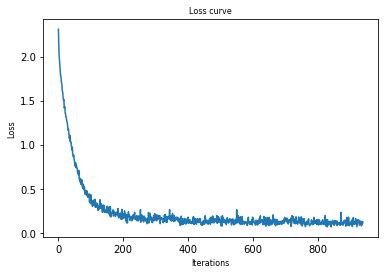

In [9]:
# Plot loss

plt.plot(losses)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.title('Loss curve', fontsize=8)
plt.savefig('results/1-fc-mnist/loss_curve.png')

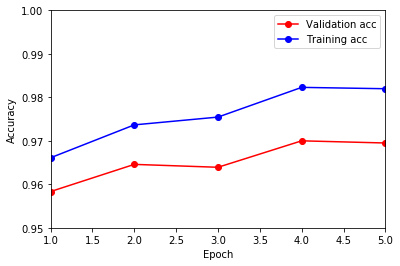

In [10]:
# Plot validation and train accuracy

plt.plot(range(1, epochs+1), valid_accs, 'r-o')
plt.plot(range(1, epochs+1), train_accs, 'b-o')
plt.xlim(1, epochs)
plt.ylim(0.95, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation acc', 'Training acc'])
plt.savefig('results/1-fc-mnist/train_val_acc.png')

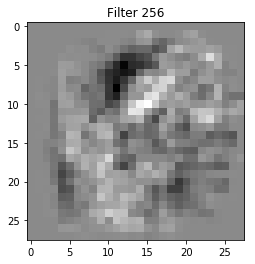

In [11]:
# Visualize FC1 weights

fc1_weight = model.state_dict()['fc1.weight']
fc1_img = fc1_weight.view(-1, 28, 28)
img_size = fc1_img.shape[0]

for i in xrange(img_size):
    filter_img = fc1_img[i]
    
    plt.imshow(filter_img.numpy(), cmap='gray')
    plt.title('Filter %d' % (i+1))
    plt.savefig('results/1-fc-mnist/fc1-vis/filter-%d.png' % (i+1))

In [12]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [13]:
# fc4 stores the hidden 64-dimensional encoding of the images. Visualize using t-SNE

img_labels = np.array([])
raw_outputs = np.array([])

def capture_fc4_out(model, inputs):
    global raw_outputs
    input_np = inputs[0].data.numpy()
    
    if raw_outputs.shape[0] <= 0:
        raw_outputs = input_np
    else:
        raw_outputs = np.append(raw_outputs, input_np, axis=0)
    

hook_handle = model.fc4.register_forward_pre_hook(capture_fc4_out)
cnt = 0

try:
    for i, data in enumerate(test_data):

        inputs, labels = data
        inputs = Variable(inputs)

        output = model(inputs)

        if img_labels.shape[0] <= 0:
            img_labels = labels.numpy()
        else:
            img_labels = np.append(img_labels, labels.numpy())

        cnt += labels.shape[0]
        print "%d processed" % cnt
finally:
    hook_handle.remove()

print "Running TSNE"
fc4_tsne_codes = TSNE(n_components=2).fit_transform(raw_outputs)
print fc4_tsne_codes.shape

print "Running PCA"
fc4_pca_codes = PCA(n_components=2).fit_transform(raw_outputs)

print fc4_pca_codes.shape 
print img_labels.shape

256 processed
512 processed
768 processed
1024 processed
1280 processed
1536 processed
1792 processed
2048 processed
2304 processed
2560 processed
2816 processed
3072 processed
3328 processed
3584 processed
3840 processed
4096 processed
4352 processed
4608 processed
4864 processed
5120 processed
5376 processed
5632 processed
5888 processed
6144 processed
6400 processed
6656 processed
6912 processed
7168 processed
7424 processed
7680 processed
7936 processed
8192 processed
8448 processed
8704 processed
8960 processed
9216 processed
9472 processed
9728 processed
9984 processed
10000 processed
Running TSNE
(10000, 2)
Running PCA
(10000, 2)
(10000,)


In [14]:
np.save('results/1-fc-mnist/fc_out_tsne/tsne_embedding', fc4_tsne_codes)
np.save('results/1-fc-mnist/fc_out_tsne/pca_embedding', fc4_pca_codes)

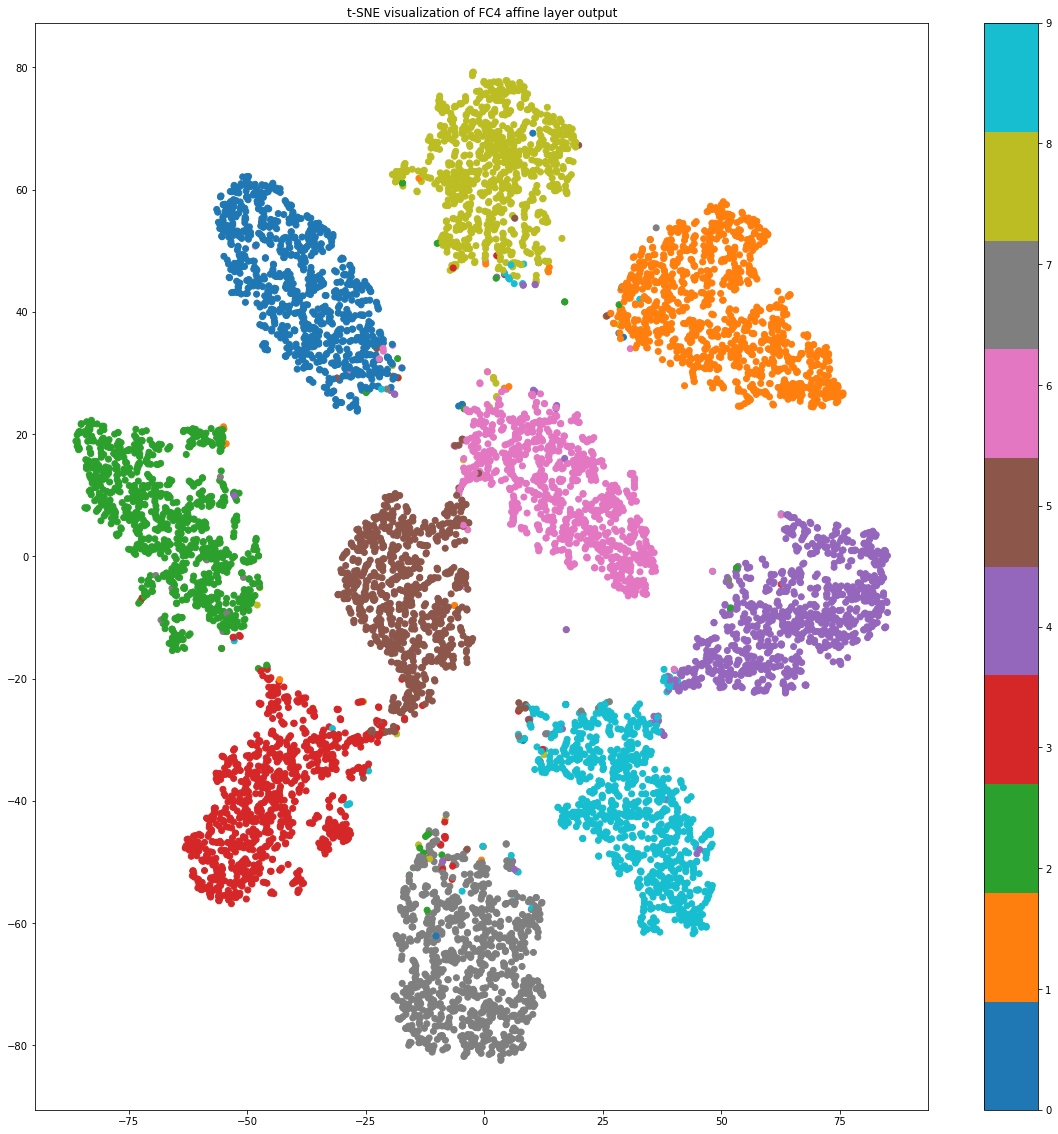

In [15]:
colormap = matplotlib.cm.get_cmap('Vega10')

plt.figure(figsize=(20, 20))
plt.scatter(fc4_tsne_codes[:,0], fc4_tsne_codes[:, 1], c=img_labels, cmap=colormap)
plt.colorbar()
plt.title('t-SNE visualization of FC4 affine layer output')
plt.savefig('results/1-fc-mnist/fc_out_tsne/tsne_fc4_output.png')

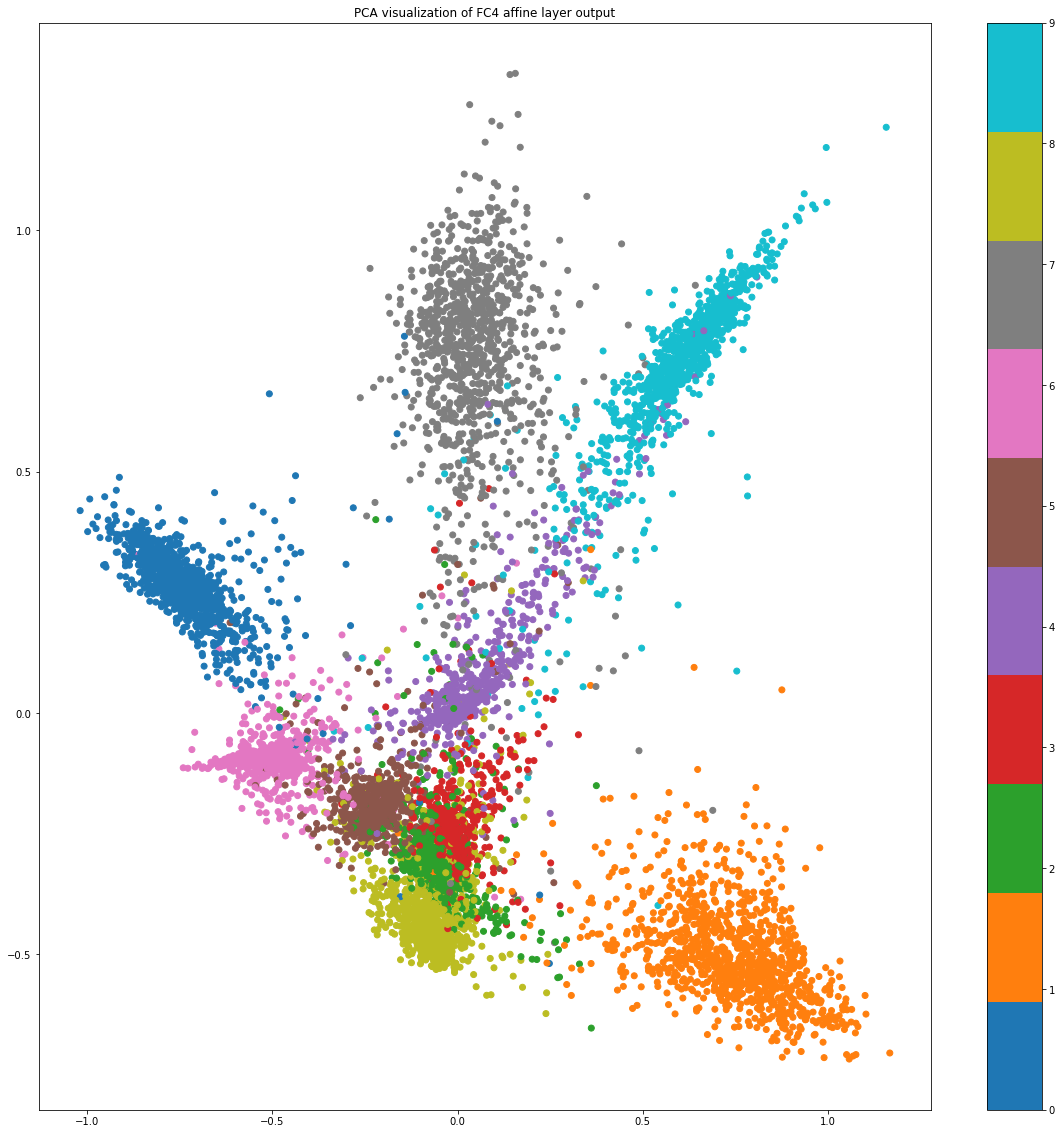

In [16]:
colormap = matplotlib.cm.get_cmap('Vega10')

plt.figure(figsize=(20, 20))
plt.scatter(fc4_pca_codes[:,0], fc4_pca_codes[:, 1], c=img_labels, cmap=colormap)
plt.colorbar()
plt.title('PCA visualization of FC4 affine layer output')
plt.savefig('results/1-fc-mnist/fc_out_tsne/pca_fc4_output.png')

In [13]:
# Individual neuron activations

IMG_PER_NEURON = 20

bn1_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

bn2_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

bn3_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

bn4_imgs = {
    'maximum': {},
    'spositive': {},
    'snegative': {},
    'zero': {},
    'minimum': {}
}

def append_data_to_dict(datadict, key, outputs, samples, neurons, reverse=False):
    global inputs, labels, IMG_PER_NEURON
    
    l = len(samples)
    
    for i in xrange(l):
        sample, neuron = samples[i], neurons[i]
        label = labels[sample]
        
        neuron_output = outputs[sample, neuron]
        img = inputs[sample].clone()
        
        if neuron not in datadict[key]:
            datadict[key][neuron] = []
        datadict[key][neuron].append((neuron_output, label, img))
        
        datadict[key][neuron] = sorted(
            datadict[key][neuron], key=lambda x: x[0], reverse=reverse
        )[:IMG_PER_NEURON]
        

def capture_bn_output(outputs, datadict):
    
    max_samples, max_neurons = np.where(outputs > 0.5)
    spos_samples, spos_neurons = np.where((outputs > 0) & (outputs <= 0.5))
    zero_samples, zero_neurons = np.where(outputs == 0)
    sneg_samples, sneg_neurons = np.where((outputs < 0) & (outputs >= -0.5))
    min_samples, min_neurons = np.where(outputs < -0.5)
    
    append_data_to_dict(datadict, 'maximum', outputs, max_samples, max_neurons, reverse=True)
    append_data_to_dict(datadict, 'spositive', outputs, spos_samples, spos_neurons, reverse=True)
    append_data_to_dict(datadict, 'zero', outputs, zero_samples, zero_neurons)
    append_data_to_dict(datadict, 'snegative', outputs, sneg_samples, sneg_neurons, reverse=False)
    append_data_to_dict(datadict, 'minimum', outputs, min_samples, min_neurons, reverse=False)
    

def bn1_out(model, inp, outputs):
    global bn1_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn1_imgs)
    
def bn2_out(model, inp, outputs):
    global bn2_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn2_imgs)

def bn3_out(model, inp, outputs):
    global bn3_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn3_imgs)
    
def bn4_out(model, inp, outputs):
    global bn4_imgs
    outputs = outputs.cpu().data.numpy()
    capture_bn_output(outputs, bn4_imgs)

In [15]:
handles = []
handles.append(model.bn1.register_forward_hook(bn1_out))
handles.append(model.bn1.register_forward_hook(bn2_out))
handles.append(model.bn1.register_forward_hook(bn3_out))
handles.append(model.bn1.register_forward_hook(bn4_out))

cnt = 0

try:
    for i, data in enumerate(test_data):

        inputs, labels = data
        inputs_var = Variable(inputs)
        output = model(inputs_var)
        
        cnt += labels.shape[0]
        print "%d processed" % cnt
finally:
    for handle in handles:
        handle.remove()

256 processed
512 processed
768 processed
1024 processed
1280 processed
1536 processed
1792 processed
2048 processed
2304 processed
2560 processed
2816 processed
3072 processed
3328 processed
3584 processed
3840 processed
4096 processed
4352 processed
4608 processed
4864 processed
5120 processed
5376 processed
5632 processed
5888 processed
6144 processed
6400 processed
6656 processed
6912 processed
7168 processed
7424 processed
7680 processed
7936 processed
8192 processed
8448 processed
8704 processed
8960 processed
9216 processed
9472 processed
9728 processed
9984 processed
10000 processed


In [ ]:
NUM_CLASSES = 10
CLASSES = range(10)

def mkfolder(folderpath):
    try:
        os.makedirs(folderpath)
    except Exception as _:
        pass

def savedict(datadict, bn_id):
    
    global NUM_CLASSES, CLASSES
    
    for clf, clf_data in datadict.iteritems():
        for neuronid, imgdata in clf_data.iteritems():
            print "Classification: %s, Neuron: %s" % (str(clf), str(neuronid))
            
            folderpath = 'results/1-fc-mnist/activations/' + bn_id + '/' + str(clf) + '/' + str(neuronid) + '/'
            mkfolder(folderpath)
            
            freq = {}

            for i, (score, label, img) in enumerate(imgdata):
                freq[label] = freq.get(label, 0) + 1
                filename = folderpath + str(label) + ', ' + str(score) + ' - ' + str(i) + '.png'
                
                plt.figure()
                plt.imshow(img.view(28, 28).numpy(), cmap='gray')
                plt.title('BN: %s, Neuron: %d, Score: %f' % (bn_id, neuronid, score))
                plt.savefig(filename)
                plt.close()
            
            
            # plot histogram
            pos = np.arange(NUM_CLASSES)
            frequencies = [freq.get(x, 0) for x in CLASSES]
            
            plt.figure()
            ax = plt.axes()
            ax.set_xticks(pos)
            ax.set_xticklabels(CLASSES)

            plt.bar(pos, frequencies, color='r')
            plt.savefig(folderpath + 'histogram.png')
            plt.close()

savedict(bn4_imgs, 'bn4')
savedict(bn3_imgs, 'bn3')
savedict(bn2_imgs, 'bn2')
savedict(bn1_imgs, 'bn1')

Classification: snegative, Neuron: 0
Classification: snegative, Neuron: 1
Classification: snegative, Neuron: 2
Classification: snegative, Neuron: 3
Classification: snegative, Neuron: 4
Classification: snegative, Neuron: 5
Classification: snegative, Neuron: 8
Classification: snegative, Neuron: 9
Classification: snegative, Neuron: 10
Classification: snegative, Neuron: 11
Classification: snegative, Neuron: 13
Classification: snegative, Neuron: 15
Classification: snegative, Neuron: 16
Classification: snegative, Neuron: 17
Classification: snegative, Neuron: 18
Classification: snegative, Neuron: 19
Classification: snegative, Neuron: 20
Classification: snegative, Neuron: 21
Classification: snegative, Neuron: 22
Classification: snegative, Neuron: 23
Classification: snegative, Neuron: 24
Classification: snegative, Neuron: 25
Classification: snegative, Neuron: 26
Classification: snegative, Neuron: 27
Classification: snegative, Neuron: 28
Classification: snegative, Neuron: 29
Classification: sneg

Classification: snegative, Neuron: 227
Classification: snegative, Neuron: 228
Classification: snegative, Neuron: 229
Classification: snegative, Neuron: 230
Classification: snegative, Neuron: 231
Classification: snegative, Neuron: 232
Classification: snegative, Neuron: 234
Classification: snegative, Neuron: 236
Classification: snegative, Neuron: 237
Classification: snegative, Neuron: 238
Classification: snegative, Neuron: 240
Classification: snegative, Neuron: 241
Classification: snegative, Neuron: 242
Classification: snegative, Neuron: 243
Classification: snegative, Neuron: 244
Classification: snegative, Neuron: 245
Classification: snegative, Neuron: 246
Classification: snegative, Neuron: 247
Classification: snegative, Neuron: 248
Classification: snegative, Neuron: 251
Classification: snegative, Neuron: 252
Classification: snegative, Neuron: 254
Classification: snegative, Neuron: 255
Classification: spositive, Neuron: 0
Classification: spositive, Neuron: 1
Classification: spositive, Ne

Classification: spositive, Neuron: 247
Classification: spositive, Neuron: 248
Classification: spositive, Neuron: 249
Classification: spositive, Neuron: 250
Classification: spositive, Neuron: 251
Classification: spositive, Neuron: 252
Classification: spositive, Neuron: 253
Classification: spositive, Neuron: 254
Classification: minimum, Neuron: 3
Classification: minimum, Neuron: 4
Classification: minimum, Neuron: 9
Classification: minimum, Neuron: 10
Classification: minimum, Neuron: 15
Classification: minimum, Neuron: 16
Classification: minimum, Neuron: 17
Classification: minimum, Neuron: 18
Classification: minimum, Neuron: 19
Classification: minimum, Neuron: 21
Classification: minimum, Neuron: 23
Classification: minimum, Neuron: 26
Classification: minimum, Neuron: 28
Classification: minimum, Neuron: 32
Classification: minimum, Neuron: 34
Classification: minimum, Neuron: 35
Classification: minimum, Neuron: 36
Classification: minimum, Neuron: 38
Classification: minimum, Neuron: 39
Classif

Classification: snegative, Neuron: 47
Classification: snegative, Neuron: 48
Classification: snegative, Neuron: 49
Classification: snegative, Neuron: 50
Classification: snegative, Neuron: 52
Classification: snegative, Neuron: 53
Classification: snegative, Neuron: 54
Classification: snegative, Neuron: 55
Classification: snegative, Neuron: 56
Classification: snegative, Neuron: 57
Classification: snegative, Neuron: 58
Classification: snegative, Neuron: 59
Classification: snegative, Neuron: 61
Classification: snegative, Neuron: 62
Classification: snegative, Neuron: 63
Classification: snegative, Neuron: 64
Classification: snegative, Neuron: 65
Classification: snegative, Neuron: 66
Classification: snegative, Neuron: 67
Classification: snegative, Neuron: 68
Classification: snegative, Neuron: 69
Classification: snegative, Neuron: 70
Classification: snegative, Neuron: 71
Classification: snegative, Neuron: 72
Classification: snegative, Neuron: 73
Classification: snegative, Neuron: 74
Classificati

Classification: spositive, Neuron: 21
Classification: spositive, Neuron: 23
Classification: spositive, Neuron: 24
Classification: spositive, Neuron: 25
Classification: spositive, Neuron: 26
Classification: spositive, Neuron: 27
Classification: spositive, Neuron: 28
Classification: spositive, Neuron: 29
Classification: spositive, Neuron: 30
Classification: spositive, Neuron: 31
Classification: spositive, Neuron: 32
Classification: spositive, Neuron: 33
Classification: spositive, Neuron: 34
Classification: spositive, Neuron: 35
Classification: spositive, Neuron: 36
Classification: spositive, Neuron: 38
Classification: spositive, Neuron: 39
Classification: spositive, Neuron: 40
Classification: spositive, Neuron: 41
Classification: spositive, Neuron: 42
Classification: spositive, Neuron: 43
Classification: spositive, Neuron: 44
Classification: spositive, Neuron: 47
Classification: spositive, Neuron: 48
Classification: spositive, Neuron: 50
Classification: spositive, Neuron: 51
Classificati

Classification: minimum, Neuron: 91
Classification: minimum, Neuron: 93
Classification: minimum, Neuron: 95
Classification: minimum, Neuron: 96
Classification: minimum, Neuron: 100
Classification: minimum, Neuron: 103
Classification: minimum, Neuron: 108
Classification: minimum, Neuron: 110
Classification: minimum, Neuron: 116
Classification: minimum, Neuron: 119
Classification: minimum, Neuron: 120
Classification: minimum, Neuron: 123
Classification: minimum, Neuron: 125
Classification: minimum, Neuron: 131
Classification: minimum, Neuron: 134
Classification: minimum, Neuron: 136
Classification: minimum, Neuron: 138
Classification: minimum, Neuron: 139
Classification: minimum, Neuron: 144
Classification: minimum, Neuron: 146
Classification: minimum, Neuron: 147
Classification: minimum, Neuron: 151
Classification: minimum, Neuron: 152
Classification: minimum, Neuron: 155
Classification: minimum, Neuron: 161
Classification: minimum, Neuron: 163
Classification: minimum, Neuron: 165
Class